Accuracy: 70.07%

Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.55      0.65        31
           2       0.76      0.81      0.78        31
           3       0.88      0.78      0.82        27
           4       0.33      0.27      0.30        11
           5       0.57      0.40      0.47        10
           6       0.82      0.67      0.74        21
           7       0.62      0.64      0.63        25
           8       0.74      0.93      0.83        28
           9       0.69      0.81      0.75        27
          10       0.71      0.71      0.71        17
          11       0.81      0.88      0.84        24
          12       0.80      0.67      0.73        24
          13       0.76      0.78      0.77        36
          14       0.56      1.00      0.71         5
          15       0.57      0.76      0.65        33
          16       0.47      0.53      0.50        17
          17       0.74      0.61      

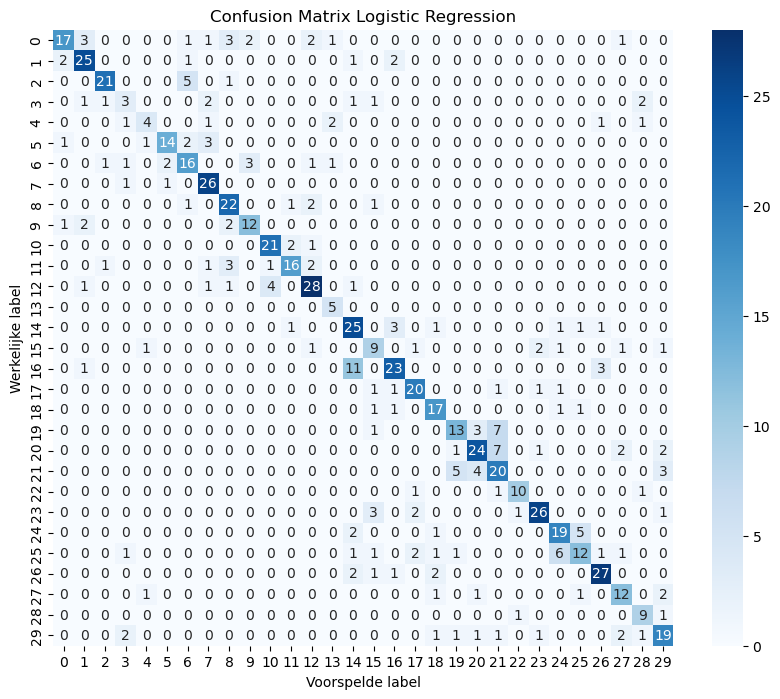

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Stap 1: Data inladen
#data = pd.read_excel("C:/Users/20201954/Desktop/data/quantitative MRI.xlsx")
#data = data.drop(columns=['subject', 'subjectID', 'sessionID', 'muscle', 'side', 'sideID','volume', 'trk_leng', 'trk_ang', 'dix_snr']) # voor originele set

#data = pd.read_excel("C:/Users/20201954/Desktop/data/cleaned_qMRI_numerical.xlsx")
#data = data.drop(columns=['volume', 'trk_leng', 'trk_ang', 'dix_snr'])

data.replace(',', '.', regex=True, inplace=True)

# Selecteer features en target
X = data.drop(columns=['muscleID'])  # Alle kolommen behalve 'muscleID' (target)
y = data['muscleID']  # De target (muscleID)

# Splits de data in een train- en testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliseer de features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Stap 2: Train een Logistic Regression-model
logistic_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logistic_model.fit(X_train_scaled, y_train)

# Maak voorspellingen op de testset
y_pred = logistic_model.predict(X_test_scaled)

# Stap 3: Evaluatie van het model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix plotten
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Voorspelde label')
plt.ylabel('Werkelijke label')
plt.title('Confusion Matrix Logistic Regression')
plt.show()


C:\Users\20201954\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\20201954\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


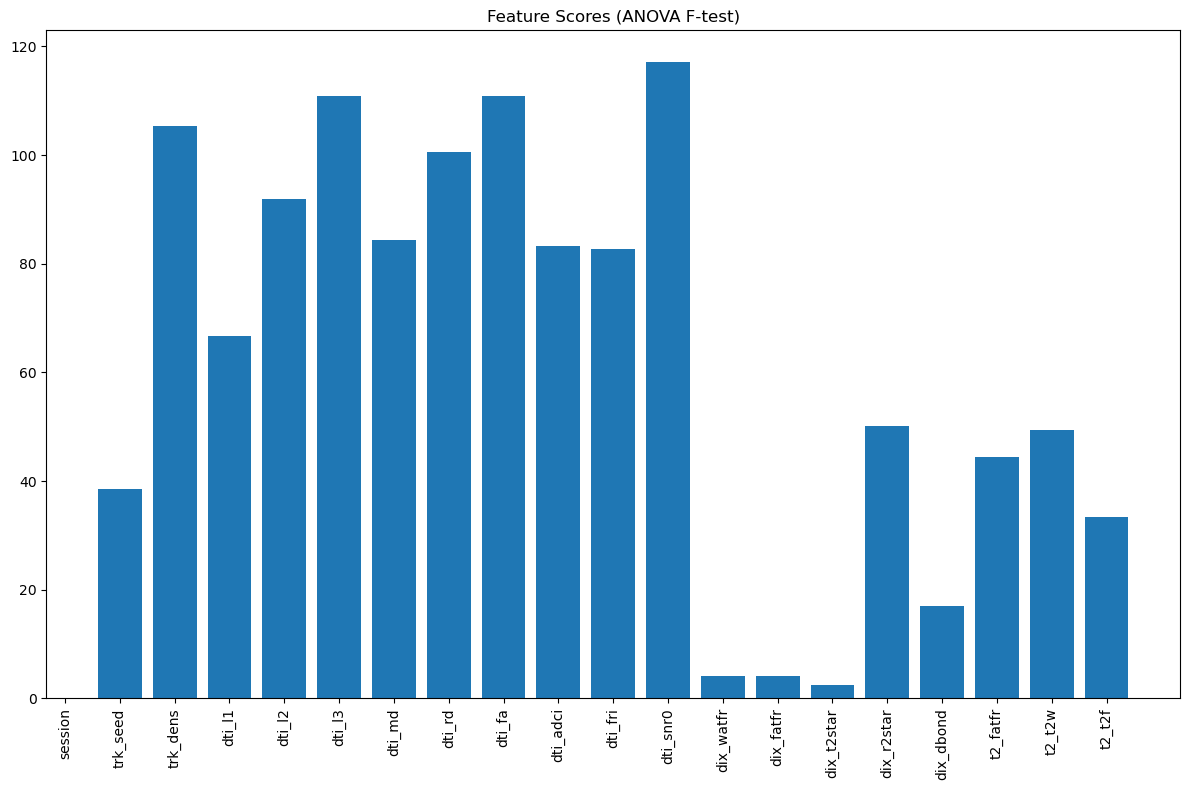

In [20]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Voor continue features en een categorische target kun je ANOVA gebruiken
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train_scaled, y_train)

# De scores laten zien welke features het meest discrimineren tussen klassen
feature_scores = selector.scores_

# Plot de scores
plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_scores)), feature_scores)
plt.xticks(range(len(feature_scores)), X.columns, rotation=90)
plt.title("Feature Scores (ANOVA F-test)")
plt.tight_layout()
plt.show()
